## Importing the necessary modules and libraries for the project. Also importing the dataset. 

In [1]:
#importing the libraries needed 
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import streamlit as st

In [2]:
#importing the dataset 
movieRatings = pd.read_csv("tv_shows.csv", index_col= [0])
movieRatings.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
ID,,,,,,,,,,
1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1


In [3]:
movieRatings.dtypes

Title              object
Year                int64
Age                object
IMDb               object
Rotten Tomatoes    object
Netflix             int64
Hulu                int64
Prime Video         int64
Disney+             int64
Type                int64
dtype: object

## Cleaning the dataset 
1. First checking the duplicate datas in the dataset 
2. Checking the null values in the dataset
3. Dropping the row containing null values and replacing some null values with 0 

In [4]:
#check duplicate values
movieRatings.duplicated()

ID
1       False
2       False
3       False
4       False
5       False
        ...  
5713    False
5714    False
5715    False
5716    False
5717    False
Length: 5368, dtype: bool

In [5]:
movieRatings.isnull()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
ID,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
5713,False,False,True,True,False,False,False,False,False,False
5714,False,False,True,True,False,False,False,False,False,False
5715,False,False,True,True,False,False,False,False,False,False


In [6]:
#dropping null values 
movieRatings.dropna(axis=0, how ='any').shape
movieRatings.dropna(axis=0, how ='any', inplace = True)

## Renaming the column names for easily accessible operations 

In [7]:
movieRatings.rename(columns = {"Rotten Tomatoes": "RottenTomatoes"}, inplace=True)
movieRatings.rename(columns = {"Prime Video": "PrimeVideo"}, inplace=True)

In [8]:
movieRatings.head()

,Title,Year,Age,IMDb,RottenTomatoes,Netflix,Hulu,PrimeVideo,Disney+,Type
ID,,,,,,,,,,
1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1


## Converting the data type from object to integer and changing fraction to integer 

In [9]:
# finding the top 10 movies in Rotten Tomatoes Ranking 
movieRatings['RottenTomatoes'] = movieRatings['RottenTomatoes'].fillna('0/100').apply(lambda x: int((x).split('/')[0]))
movieRatings['IMDb'] = movieRatings['IMDb'].fillna('0.0/10').apply(lambda x: float((x).split('/')[0]))


In [10]:
movieRatings.sort_values(by= "RottenTomatoes", ascending=False).head(10)

,Title,Year,Age,IMDb,RottenTomatoes,Netflix,Hulu,PrimeVideo,Disney+,Type
ID,,,,,,,,,,
1,Breaking Bad,2008,18+,9.4,100,1,0,0,0,1
1960,Rick and Morty,2013,18+,9.2,100,0,1,0,0,1
2,Stranger Things,2016,16+,8.7,96,1,0,0,0,1
3,Attack on Titan,2013,18+,9.0,95,1,1,0,0,1
5376,Loki,2021,16+,8.5,95,0,0,0,1,1
5377,The Mandalorian,2019,16+,8.8,94,0,0,0,1,1
4,Better Call Saul,2015,18+,8.8,94,1,0,0,0,1
3581,The Boys,2019,18+,8.7,93,0,0,1,0,1
1962,Seinfeld,1989,16+,8.8,93,0,1,0,0,1


### Pie Chart Showing Shows Around Different OTT Pltaforms 

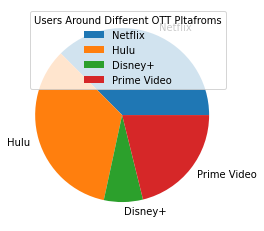

In [11]:
netflix = movieRatings['Netflix'].sum()
hulu = movieRatings['Hulu'].sum()
disney = movieRatings['Disney+'].sum()
prime = movieRatings['PrimeVideo'].sum()
labels = ['Netflix', 'Hulu', 'Disney+', 'Prime Video']
values = [netflix, hulu, disney, prime]
plt.pie(values, labels = labels);
plt.legend(title="Users Around Different OTT Pltafroms");



The pie chart formed shows that the highest number of shows are available on Netflix, followed by Hulu and Prime Video.
Disney+ has comparatively less number of shows among the OTT Pltaforms. This shows why Netflix is popular among all the OTT 
Pltaforms. Disney+ might have less number of shows due to its late coming in the market. 

# Analysis of Data Related to Age 

In [12]:
year = movieRatings['Age'].unique()
year

array(['18+', '16+', '7+', 'all', '13+'], dtype=object)

In [13]:
#removing + from age column to change the datatype to integer 

movieRatings['Age'] = movieRatings['Age'].replace(['18+', '16+', '7+', '13+', 'all'],['18', '16', '7', '13', '1'])
movieRatings["Age"] = pd.to_numeric(movieRatings["Age"])

## Bar Graph Showing Age wise Show Distribution

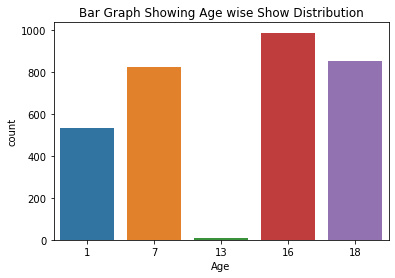

In [14]:
sns.countplot(x='Age', data=movieRatings);
plt.title('Bar Graph Showing Age wise Show Distribution');

This shows the graph plot showing the count of shows in the dataset according to the agewise censorship. Most of the TV Shows 
were for mature audience who were above 16 years of age, Least number of shows were for audiences who were just starting their
teenage. I think more shows regarding the changes they might face in their older years must be built on to provide them 
knowledge on how to deal with the problems they might face in the future. 

# Scatter Plot of Age vs Year 

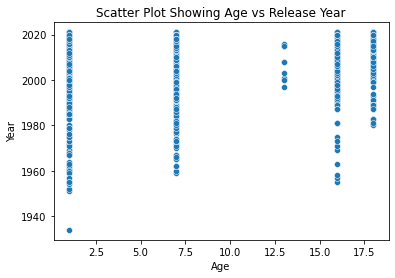

In [15]:
sns.scatterplot(y='Year', x='Age', data=movieRatings);
plt.title('Scatter Plot Showing Age vs Release Year');

The scatter plot shows the distribution between the year of movies released versus the age group the movie could be watched by.
The scatter plot shows that most of the movies are for the audiences of all age and comparative number of shows are of the 
viewers above age of 16 but few amounts of show are targeted to the viewers above age of 13. 


### Top 10 Movies on Each Rating Sites 

In [16]:
top10movies = movieRatings.nlargest(10, ['RottenTomatoes'])
top10movies

,Title,Year,Age,IMDb,RottenTomatoes,Netflix,Hulu,PrimeVideo,Disney+,Type
ID,,,,,,,,,,
1,Breaking Bad,2008,18,9.4,100,1,0,0,0,1
1960,Rick and Morty,2013,18,9.2,100,0,1,0,0,1
2,Stranger Things,2016,16,8.7,96,1,0,0,0,1
3,Attack on Titan,2013,18,9.0,95,1,1,0,0,1
5376,Loki,2021,16,8.5,95,0,0,0,1,1
4,Better Call Saul,2015,18,8.8,94,1,0,0,0,1
5377,The Mandalorian,2019,16,8.8,94,0,0,0,1,1
5,Dark,2017,16,8.8,93,1,0,0,0,1
6,Avatar: The Last Airbender,2005,7,9.3,93,1,0,1,0,1


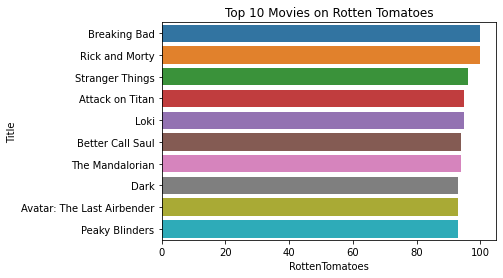

In [17]:
sns.barplot(y="Title", x="RottenTomatoes", data=top10movies);
plt.title('Top 10 Movies on Rotten Tomatoes');

The bar graph expresses the result obtained from the query above. This shows that Breaking Bad and RicK & Morty are the 
best rated TV shows in the Rotten Tomatoes platform.

In [18]:
top10moviesIMDb = movieRatings.nlargest(10, ['IMDb'])
top10moviesIMDb

,Title,Year,Age,IMDb,RottenTomatoes,Netflix,Hulu,PrimeVideo,Disney+,Type
ID,,,,,,,,,,
4054,The Secret World of Nature: Spain,2020,7,9.6,51,0,0,1,0,1
5401,Bluey,2018,1,9.6,71,0,0,0,1,1
3818,Malgudi Days,1987,1,9.5,62,0,0,1,0,1
1,Breaking Bad,2008,18,9.4,100,1,0,0,0,1
6,Avatar: The Last Airbender,2005,7,9.3,93,1,0,1,0,1
81,Our Planet,2019,1,9.3,82,1,0,0,0,1
2034,Cosmos,2014,1,9.3,82,0,1,1,1,1
1960,Rick and Morty,2013,18,9.2,100,0,1,0,0,1
3668,Clarkson's Farm,2021,7,9.2,76,0,0,1,0,1


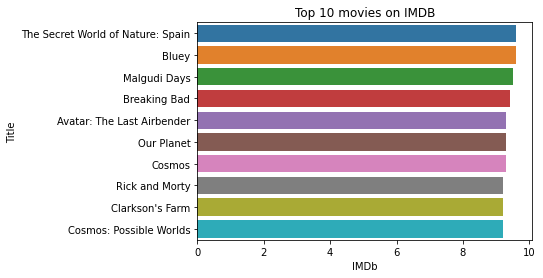

In [19]:
sns.barplot(y='Title', x='IMDb', data=top10moviesIMDb);
plt.title('Top 10 movies on IMDB');

The bar graph is created to form the visualization obtained in the above query. The result obtained from both the visualizations
shows that "Rick and Morty ", "Breaking Bad", and "Avatar: The Last Airbender" are the three shows which are in the top 10 
rankings for both rating platform. 

### Calculating the movies in dataset with 100 Rotten Tomatoes rating 

In [20]:
movieRatings[movieRatings.RottenTomatoes == 100].count()

Title             2
Year              2
Age               2
IMDb              2
RottenTomatoes    2
Netflix           2
Hulu              2
PrimeVideo        2
Disney+           2
Type              2
dtype: int64

The result shows that the dataset consists of two entries with 100 rating on Rotten Tomatoes. 

## Line Graph Between movies before and after 2000 on the basis of age categories 

In [21]:
#Movies before 2000 
Before2000 = movieRatings[(movieRatings['Year'] <= 2000 )]
Before2000

,Title,Year,Age,IMDb,RottenTomatoes,Netflix,Hulu,PrimeVideo,Disney+,Type
ID,,,,,,,,,,
41,Star Trek: The Next Generation,1987,7,8.6,86,1,1,1,0,1
55,One Piece,1999,7,8.8,85,1,1,0,0,1
68,Gilmore Girls,2000,16,8.1,84,1,0,0,0,1
85,Star Trek,1966,7,8.3,82,1,1,1,0,1
92,Neon Genesis Evangelion,1995,16,8.5,82,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
5568,Bonkers,1993,1,6.8,47,0,0,0,1,1
5586,Adventures in Wonderland,1992,7,8.0,46,0,0,0,1,1
5597,The Avengers: United They Stand,1999,7,5.5,45,0,0,0,1,1


In [22]:
#movies after 2000
After2000 = movieRatings[(movieRatings['Year'] > 2000)]
After2000

,Title,Year,Age,IMDb,RottenTomatoes,Netflix,Hulu,PrimeVideo,Disney+,Type
ID,,,,,,,,,,
1,Breaking Bad,2008,18,9.4,100,1,0,0,0,1
2,Stranger Things,2016,16,8.7,96,1,0,0,0,1
3,Attack on Titan,2013,18,9.0,95,1,1,0,0,1
4,Better Call Saul,2015,18,8.8,94,1,0,0,0,1
5,Dark,2017,16,8.8,93,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
5684,Disney Family Sundays,2019,1,5.6,31,0,0,0,1,1
5687,Wild Chile,2018,7,7.5,30,0,0,0,1,1
5688,Howie Mandel's Animals Doing Things,2018,1,3.2,30,0,0,0,1,1


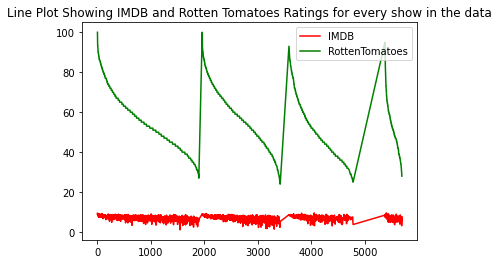

In [23]:

#imdb rating plot 
a =movieRatings.IMDb
b = movieRatings.RottenTomatoes;
plt.plot(a, color='r', label='IMDB');
plt.plot(b, color='g',label='RottenTomatoes');
plt.title('Line Plot Showing IMDB and Rotten Tomatoes Ratings for every show in the data');
plt.legend();

The plot above shows the overall range of ratings on two different platforms, As IMDB ratings are 1-10 on rating they are at lower part of the visualization whereas the Rotten Tomatoes rating are fluctuating a lot due to the rating being carried out on a higher rate.  